In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

dephasing channel

In [7]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.,1,0.05):   
    
    p=h
    
    B = np.zeros([1,1,4])
    
    B[0,0] =(np.array([[0,1],[0,0]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        

    trans = funcs.single_trans_dephasing(p)
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,30)
    MPS_power.update(0,400)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])


    
    T1 = funcs.single_T_dephasing(p)
    MPO3 = iMPS.iMPO()
    MPO3.construct_from_tensor_list([T1])
    
    
    strap1 = iMPS.strap(MPS,MPO3,MPS)
    lam1= strap1.calculate_eig()
    
    T2 = funcs.single_T_dephasing(p,"I","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T2])
    
    
    strap2 = iMPS.strap(MPS,MPO4,MPS)
    lam2 = strap2.calculate_eig()
    
    
    T3 = funcs.single_T_dephasing(p,"X","I")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap3 = iMPS.strap(MPS,MPO4,MPS)
    lam3 = strap3.calculate_eig()
    
    T3 = funcs.single_T_dephasing(p,"X","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    dims.append(MPS.chi[0])
   
    lam1s.append(lam1)
    lam2s.append(lam2)
    lam3s.append(lam3)
    lam4s.append(lam4)

In [8]:
lam1s = np.real(lam1s)
lam2s = np.real(lam2s)
lam3s = np.real(lam3s)
lam4s = np.real(lam4s)

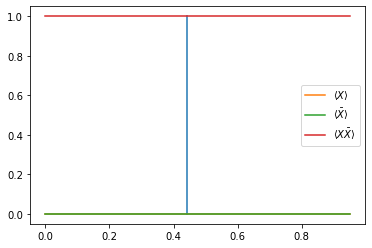

In [9]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0.,1])

pyplot.plot(np.arange(0.,1,0.05),lam2s/lam1s,label = '$\langle X \\rangle$')
pyplot.plot(np.arange(0.,1,0.05),lam3s/lam1s,label = '$\langle \\bar{X}\\rangle$')
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.05),lam4s/lam1s,label = '$\langle X\\bar{X} \\rangle$')
pyplot.legend()
pyplot.show()

Text(0, 0.5, '$\\chi$')

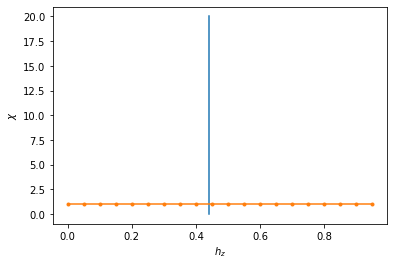

In [10]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,20])
pyplot.plot(np.arange(0,1,0.05),dims,'.-')
pyplot.xlabel('$h_z$')
pyplot.ylabel('$\chi$')

In [11]:
M = np.zeros([2,2,3])
M[:,:,0] = np.eye(2)*np.sqrt(1-p)
M[:,:,1] = np.array([[np.sqrt(p),0],[0,0]])
M[:,:,2] = np.array([[0,0],[0,np.sqrt(p)]])
    
dM = np.tensordot(M,M,([1,2],[1,2]))

In [12]:
dM

array([[1., 0.],
       [0., 1.]])